<a href="https://colab.research.google.com/github/endlichL/LuizDorfman_data_Science/blob/master/Analisando_os_Dados_do_Airbnb_Montreal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <img alt="" width="15%" src="https://raw.githubusercontent.com/endlichL/LuizDorfman_data_Science/master/Rise.png">


*by [Luiz Dorfman](https://github.com/endlichL/LuizDorfman_data_Science)*

---

# Análise dos Dados do Airbnb - *Montreal, Quebec, Canada*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, será analisado os dados referentes à cidade do Quebec, afim coletar e verificar insights que podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados

A importação e coleta dos dados foi obtida através do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html).

Para tal análise será considerado o seguinte arquivo :

* `listings.csv` - *Summary information and metrics for listings in Montreal (good for visualisations).* 

In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame

df = pd.read_csv("http://data.insideairbnb.com/canada/qc/montreal/2020-04-20/visualisations/listings.csv")

## Análise dos Dados


**Listando as variáveis**

* `id` - Número de id gerado para identificar o imóvel
* `name` - Nome da propriedade 
* `host_id 	host_name` - Número de identificador do proprietário
* `neighbourhood_group` - (nenhum valor)
* `neighbourhood` - Vizinhança ou comunidade
* `latitude` - Coordenadas geograficas da propriedade 
* `longitude` - Coordenadas geograficas da propriedade 
* `room_type` - Tipo de quarto
* `price` - Preço do imóvel
* `room_type` - Tipo de quarto
* `minimum_nights` - Número minimo de noites para alugar o imóvel
* `number_of_reviews` - Número de visualizações sobre o imóvel
* `last_review` - Ultima visualização sobre o imóvel
* `reviews_per_month ` - Visualização por mês do imóvel
* `calculated_host_listings_count` - Quantidade de imóveis do mesmo proprietário
* `availability_365` - Disponibilidade nos ultimos 365 dias




Inicialmente à analise inicia - se, considerando as 10 primeiras entradas do *dataset*.

In [6]:
# mostrar as 10 primeiras entradas

df.head (10)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2078,Central comfy close to Metro Laurie,2277,Nelia,NaN,Le Plateau-Mont-Royal,45.53069,-73.58588,Private room,39,2,245,2018-09-23,2.33,1,109
1,2843,Fabulous downtown/airport room,2319,Gail,NaN,Le Sud-Ouest,45.48496,-73.58001,Private room,29,7,143,2019-12-30,1.08,6,201
2,14584,"Spread Out in 1,200 Square Feet of Luxury in t...",57358,Verona,NaN,Le Plateau-Mont-Royal,45.54135,-73.57814,Entire home/apt,175,3,177,2020-03-22,1.64,1,354
3,29059,Lovely studio Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51939,-73.56482,Entire home/apt,80,2,326,2020-03-20,2.72,2,323
4,29061,Maison historique - Quartier Latin,125031,Maryline,NaN,Ville-Marie,45.51929,-73.56493,Entire home/apt,145,3,66,2020-02-17,0.66,2,324
5,31847,Downtown/Airport room,2319,Gail,NaN,Le Sud-Ouest,45.48467,-73.57995,Private room,30,2,153,2020-01-07,1.28,6,294
6,34715,Chez Patrac ! Métro Beaubien,149769,Alain,NaN,Rosemont-La Petite-Patrie,45.53840,-73.60355,Entire home/apt,140,4,4,2011-09-12,0.03,1,269
7,36301,Romantic & peaceful Plateau loft,381468,Sylvie,NaN,Le Plateau-Mont-Royal,45.52836,-73.58342,Entire home/apt,50,32,38,2020-03-17,0.64,7,337
8,38118,Beautiful room with a balcony in front of a parc,163569,M.,NaN,Ville-Marie,45.52699,-73.55840,Private room,50,2,14,2019-09-15,0.13,3,365
9,41819,Comfortable 2 B/R Downtown Montreal,2319,Gail,NaN,Le Sud-Ouest,45.48430,-73.57939,Entire home/apt,99,2,401,2020-03-14,3.40,6,226


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Nesta estapa verifica - se o numero total de entradas e os tipos de variaveis que tem - se em cada coluna.

Nota - se que esta versão é a mais simples e não contém todos os dados, no site onde encontra - se o arquivo `listings.csv` existe uma versão mais completa que contém um total de 19731 entradas e mais de 106 variáveis (`listings.csv.gz`).

In [7]:
# identificando a quantidade de volume de dados do DataFrame (coordenadas cartesianas)
print("Entradas:\t {}".format(df.shape[0]))
print("Variaveis:\t {}\n".format(df.shape[1]))

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	 19731
Variaveis:	 16



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A necessidade de se analisar se existe valores ausentes em um *dataset* esta diretamente ligada se a qualidade do mesmo é valida para continaur o processo de análise, nesta estapa verifica - se os valores "nulos" e se serão ou não impeditivos para a continuidade.

* Nota - se que para a coluna de `neighbourhood_group` a mesma possui 100% de seus valores faltantes

* Para os campos `reviews_per_month` e `last_review`, ambas tem cerca de 20%  nulos.

* As variáveis de `name` e `host_name` tem seus valores nulos quase que zerados, aproximadamente 0,1%.

In [8]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.202879
last_review                       0.202879
name                              0.000912
host_name                         0.000051
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Para identificar a distribuição de frequências de um conjunto de dados quantitativos contínuos, será plotado um grafico no formato de histograma.

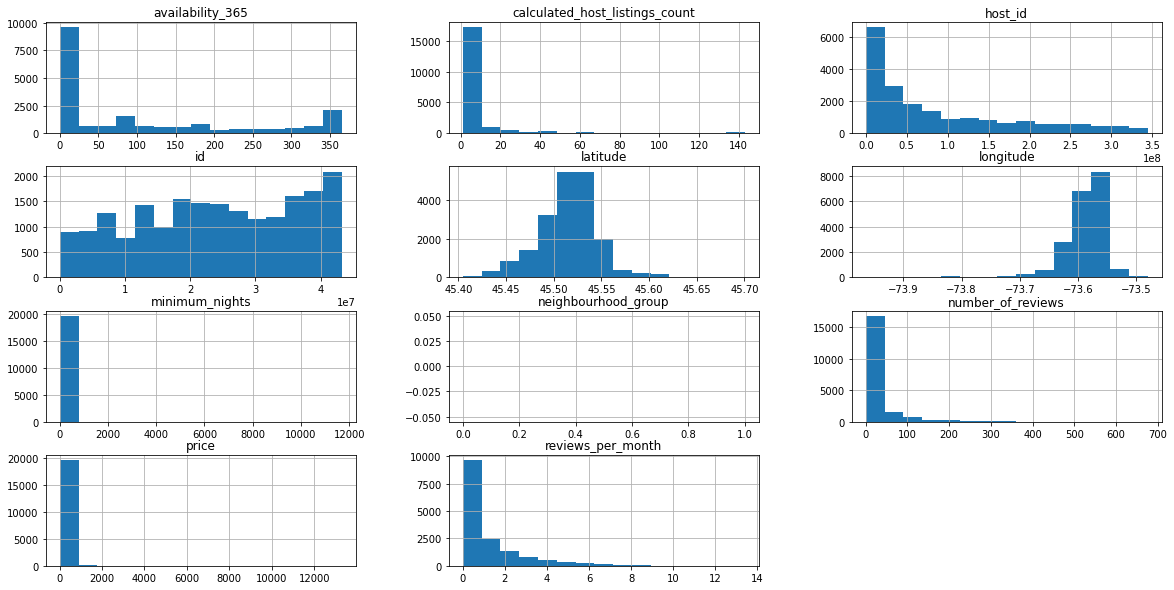

In [14]:
# plotar o histograma das variáveis numéricas

df.hist(bins=15, figsize=(20,10));

### **Q4. Há outliers presentes?**

Os outliers são dados que se diferenciam drasticamente de todos os outros, são pontos fora da curva. Em outras palavras, um outlier é um valor que foge da normalidade e que pode (e provavelmente irá) causar anomalias nos resultados obtidos por meio de algoritmos e sistemas de análise.

Nota - se que a distribuição através do histograma não apresenta de forma coesa a realidade apresentada no *dataset*, onde verificou - se as 10 primeiras entradas, os indicios de outliers podem ser notados nos campos como `price`, `minimum_nights` e `calculated_host_listings_count`, percebe - se que os valores se distorcem da realidade apresentada.

A seguir será apresentado duas formas rapidas de detectar outliers são elas:

* Resumo estatístico por meio do método `describe()`
* Plotar `boxplots` para cada variável.


In [15]:
# Resumo estatistico de variáveis que contém outliers

df[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,19731.000000,19731.000000,19731.000000,15728.000000,19731.000000,19731.000000
mean,115.074603,10.714764,23.139577,1.230853,6.238863,104.254726
std,232.801705,89.794089,46.376375,1.622968,15.858081,129.375992
min,10.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,49.000000,1.000000,1.000000,0.170000,1.000000,0.000000
50%,78.000000,2.000000,5.000000,0.550000,1.000000,37.000000
75%,120.000000,5.000000,23.000000,1.660000,3.000000,180.000000
max,13294.000000,11684.000000,676.000000,13.390000,143.000000,365.000000


Verificando - se o resumo estatistico nota - se que :

*count* - número total de entradas

*mean* - média de preço 

*std* - Desvio padrão

* A variável `price`(preço) possui 75% de seu valor abaixo de 120, contudo seu valor máximo é de 13294.

* A variável `minimum_nights`(minimo de noites), está acima de 365 dias no ano.

#### Boxplot para minimum_nights

minimum_nights: valores acima de 30:
1750 entradas
8.8693%


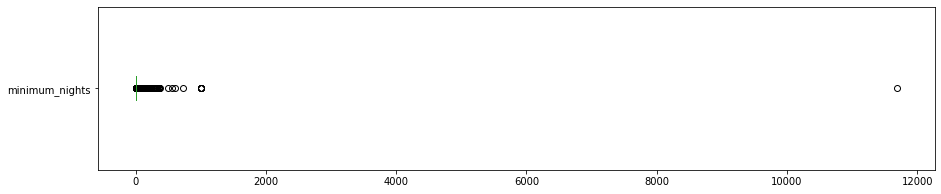

In [18]:
#minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))

# ver quantidade de valores acima de 30 dias para minimum_nights
print("minimum_nights: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

#### Boxplot para price


price: valores que excedem 1500:
57 entradas
0.2889%


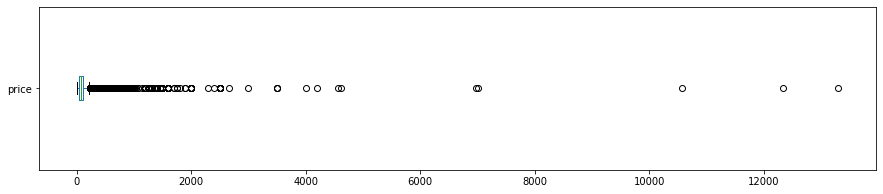

In [25]:
#price

df.price.plot(kind='box', vert=False, figsize=(15,3))

#ver quantidade de valores acima de 1500 para price
print("\nprice: valores que excedem 1500:")
print("{} entradas".format(len(df[df.price > 1500])))
print("{:.4f}%".format((len(df[df.price > 1500]) / df.shape[0])*100))

#### Histogramas sem *outliers*

Identificou - se outliers nas variáveis de `price` e `minimum_nights`, esta etapa tem como objetivo retirar do Dataframe estes "pontos" que estão gerando esta perturbação nos gráficos. 

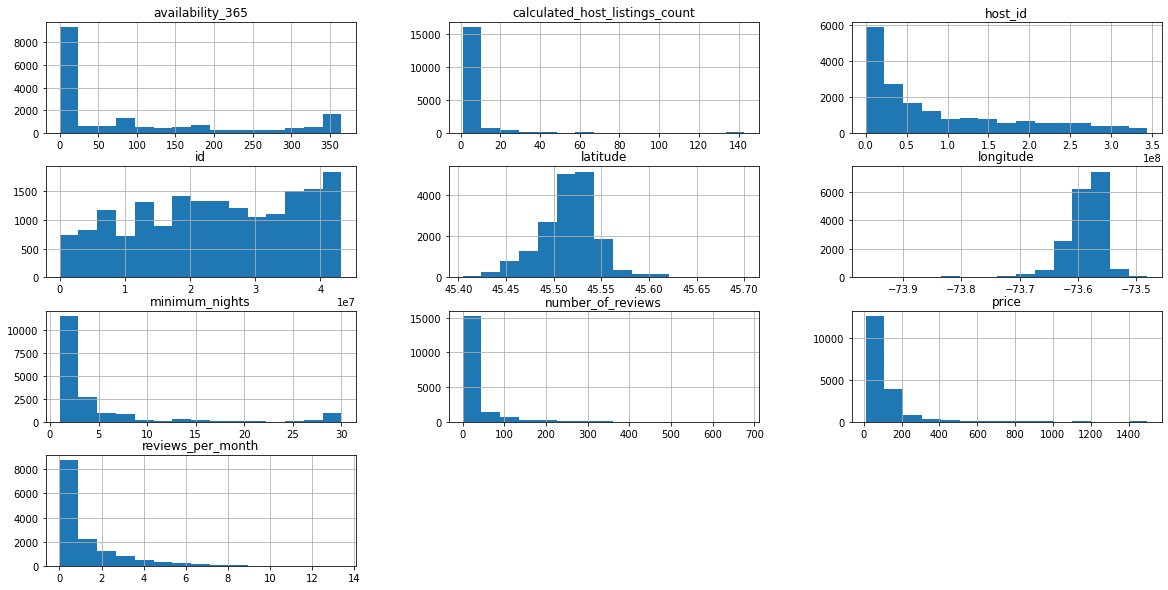

In [29]:
#removendo os "outliers" em um novo dataframe com as informações copiadas do antigo.

df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 1500].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#Removendo "neighbourhood_group" devido o mesmo não conter NENHUMA informação
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotar o novo histograma para as variaveis restantes.
df_clean.hist(bins=15, figsize=(20,10));


### **Q5. Qual a média dos preços de aluguel?**

O valor médio em termos de preço para aluguel esta em torno de 108,414 CAD.

In [52]:
# ver a média da coluna `price``
df_clean.price.mean()


108.41427774679309

### **Q6. Qual a correlação existente entre as variáveis**

correlação, dependência ou associação é qualquer relação estatística (causal ou não causal) entre duas variáveis e correlação é qualquer relação dentro de uma ampla classe de relações estatísticas que envolva dependência entre duas variáveis.Por exemplo, a correlação entre a estatura dos pais e a estatura dos pais e dos filhos. Embora seja comumente denotada como a medida de relação entre duas variáveis aleatórias,correlação não implica causalidade.

Em alguns casos, correlação não identifica dependência entre as variáveis. Em geral, há pares de variáveis que apresentam forte dependência estatística, mas que possuem correlação nula. Para este casos, são utilizadas outras medidas de dependência.

Tendo como base a premissa acima será entao realizado uma identificação de relação e se a mesma pode ser mensurada, com os seguintes parâmetros.

* Criar uma matriz de correlação.
* Gerar um heatmap a partir dessa matriz, usando a biblioteca `seaborn`


In [35]:
# criar uma matriz de correlação
corr = df_clean[['price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']].corr()
# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.009340,0.023012,0.047871,0.104849,0.140293
minimum_nights,-0.009340,1.000000,-0.074281,-0.110965,0.125973,0.129156
number_of_reviews,0.023012,-0.074281,1.000000,0.714545,0.064706,0.174829
reviews_per_month,0.047871,-0.110965,0.714545,1.000000,0.068840,0.198085
calculated_host_listings_count,0.104849,0.125973,0.064706,0.068840,1.000000,0.126020
availability_365,0.140293,0.129156,0.174829,0.198085,0.126020,1.000000


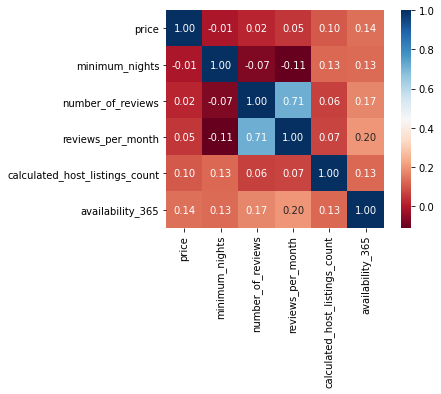

In [38]:
# plotar um heatmap a partir das correlações

sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);


Nota - se que as variáveis `reviwes_per_month` e a `number_of_reviews` tem um alto grau de correlação, a visualização atráves do heatmap deixa bem perceptível.


### **Q7. Qual o tipo de imóvel mais alugado no Airbnb?**

A coluna da variável room_type indica o tipo de locação que está anunciada no Airbnb, atráves do site existem opções de apartamentos/casas inteiras, apenas o aluguel de um quarto ou mesmo dividir o quarto com outras pessoas.

Por meio do método `value_counts()`, será possivel contabilizar as ocorrências e assim traçar padrões para analise.




In [39]:
# mostrar a quantidade de cada tipo de imóvel disponível

df_clean.room_type.value_counts()

Entire home/apt    12516
Private room        5195
Shared room          152
Hotel room            67
Name: room_type, dtype: int64

In [40]:
# mostrar a porcentagem de cada tipo de imóvel disponível

df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.698048
Private room       0.289738
Shared room        0.008477
Hotel room         0.003737
Name: room_type, dtype: float64

### **Q8. Qual a localidade mais cara do QUEBEC?**



In [41]:
# ver preços por bairros, na média
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Baie-d'Urfé                      502.000000
Westmount                        166.105263
Hampstead                        154.000000
L'Île-Bizard-Sainte-Geneviève    139.400000
Côte-Saint-Luc                   134.360000
Ville-Marie                      132.363819
Outremont                        123.830645
Montréal-Ouest                   116.000000
Saint-Léonard                    115.272727
Montréal-Est                     114.600000
Name: price, dtype: float64

Acima, tem - se  bairros como Baie-d' Urfé, Westmount e Hampstead, estão com média de preço superior a de lugares como Ville-Marie e Saint-Léonard.

Uma pessoa que não conhecesse o Quebec apresentar esses resultados sem se questionar. Só para dar um único exemplo de como uma amostra pode ser não-representativa, nota - se quantas entradas há para a Baie-d 'Urfé.


In [47]:
# ver quantidade de imóveis na Baie-d 'Urfé
print(df_clean[df_clean.neighbourhood == "Baie-d'Urfé"].shape)


#ver 3 west Island  entradas
df_clean[df_clean.neighbourhood == "Baie-d'Urfé"]

(4, 15)


,id,name,host_id,host_name,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
76,211602,Beautiful sun-filled Studio,407029,Hans,Baie-d'Urfé,45.41419,-73.90768,Entire home/apt,70,2,159,2019-08-20,2.02,1,321
1300,4180573,Serenity dream in Montreal Quebec......,21688243,Simin,Baie-d'Urfé,45.41190,-73.91085,Entire home/apt,423,7,0,NaN,NaN,2,365
8647,21829593,Seize the Day in Montreal.........,21688243,Simin,Baie-d'Urfé,45.41134,-73.90997,Entire home/apt,1354,4,0,NaN,NaN,2,365
10604,25783067,Two-bedroom studio with simple breakfast & pool,41285013,Wendy,Baie-d'Urfé,45.41361,-73.90494,Entire home/apt,161,3,39,2019-08-29,1.74,1,50


Como são fornecidas as Latitudes e Longitudes para os imóveis, é possível plotar cada ponto. Para isso, considera-se x=longitude e y=latitude.

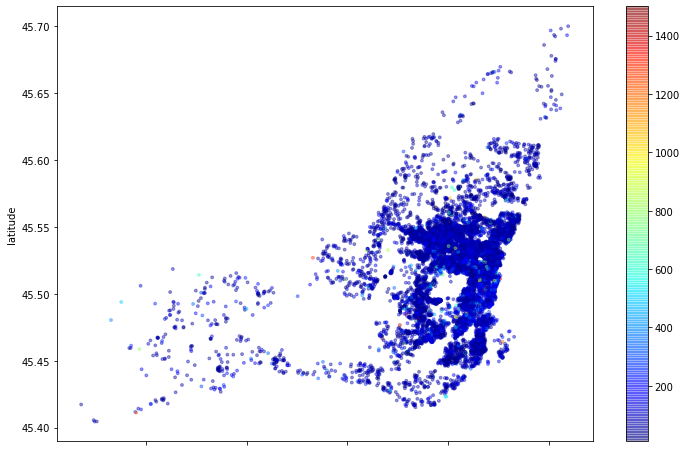

In [57]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, 
              cmap=plt.get_cmap('jet'), figsize=(12,8));


### **Q9. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [44]:
# ver a média da coluna `minimum_nights``

df_clean.groupby(['neighbourhood']).minimum_nights.mean().sort_values(ascending=False)[:10]

neighbourhood
Mont-Royal                              11.973684
Kirkland                                 8.600000
Hampstead                                5.611111
Anjou                                    5.500000
Le Sud-Ouest                             5.214286
Verdun                                   4.984444
Dollard-des-Ormeaux                      4.764706
Ville-Marie                              4.742583
Saint-Laurent                            4.672515
Villeray-Saint-Michel-Parc-Extension     4.489642
Name: minimum_nights, dtype: float64

## Conclusões


Conclusões

Realizou - se uma análise superficial na base de dados do Airbnb, porém  percebe - se que existem outliers em algumas das variáveis.

Também se notou que em algumas localidades há poucos imóveis disponíveis, o que pode distorcer as informações estatísticas de alguns atributos.

Por fim, lembra-se que este dataset é uma versão resumida, ideal apenas para uma abordagem inicial. Recomenda-se que seja usado, em uma próxima análise exploratória, o conjunto de dados completos, com 106 atributos disponíveis.